# What is a convolution? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_with_annot, load_fashion
%matplotlib inline

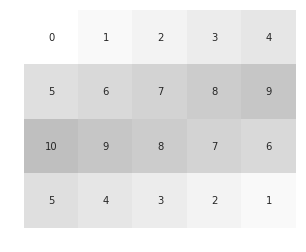

In [2]:
small_image = np.concatenate([np.arange(10), np.arange(10, 0, -1)]).reshape((4, 5))
fig1 = plot_with_annot(small_image)

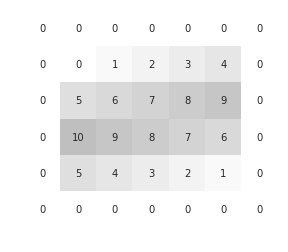

In [3]:
small_image = np.pad(small_image, 1, 'constant')
fig1 = plot_with_annot(small_image)

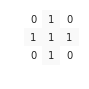

In [4]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

fig2 = plot_with_annot(kernel) 
fig2.set_size_inches([1, 1])

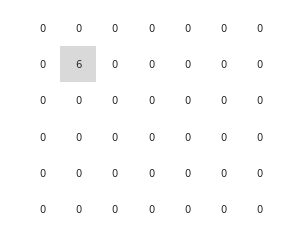

In [5]:
result = np.zeros(small_image.shape)

result[1, 1] += np.sum(small_image[:3, :3] * kernel)
fig3 = plot_with_annot(result)

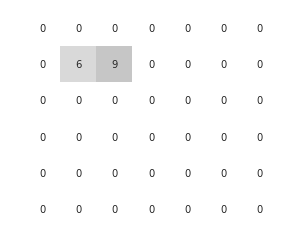

In [6]:
result[1, 2] += np.sum(small_image[:3, 1:4] * kernel)
fig3 = plot_with_annot(result)

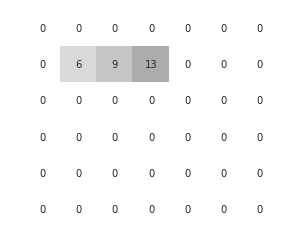

In [7]:
result[1, 3] += np.sum(small_image[:3, 2:5] * kernel)
fig3 = plot_with_annot(result)

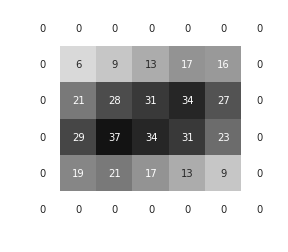

In [8]:
result = np.zeros(small_image.shape)

for ii in range(small_image.shape[0]-2):
    for jj in range(small_image.shape[1]-2):
        result[ii+1, jj+1] = np.sum(small_image[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel)

_ = plot_with_annot(result)

In [18]:
im = plt.imread('./bricks.png')

In [19]:
im = np.mean(im[..., :3], -1)

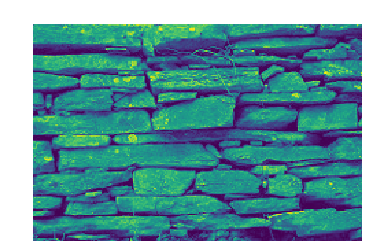

In [22]:
fig, ax = plt.subplots(1)
ax.matshow(im)
ax.set_axis_off()

In [11]:
conv = np.zeros(im.shape)

for ii in range(1, im.shape[0]-2):
    for jj in range(1, im.shape[1]-2):
        conv[ii, jj] = np.sum(im[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel)


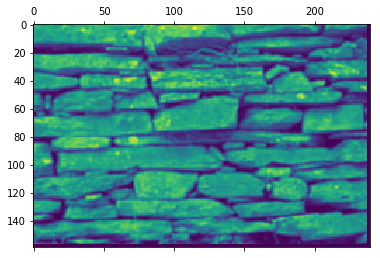

In [12]:
plt.matshow(conv)

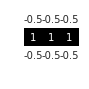

In [24]:
kernel = np.array([[-0.5, -0.5, -0.5], [1, 1, 1], [-0.5, -0.5, -0.5]])
fig2 = plot_with_annot(kernel, vmax=1)
fig2.set_size_inches([1, 1])

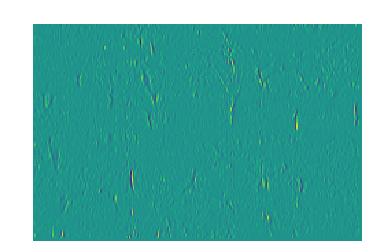

In [27]:
conv = np.zeros(im.shape)

for ii in range(1, im.shape[0]-2):
    for jj in range(1, im.shape[1]-2):
        conv[ii, jj] = np.sum(im[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel)

fig, ax = plt.subplots(1)
ax.matshow(conv)
ax.set_axis_off()

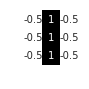

In [26]:
kernel = np.array([[-0.5, 1, -0.5], [-0.5, 1, -0.5], [-0.5, 1, -0.5]])
fig2 = plot_with_annot(kernel, vmax=1)
fig2.set_size_inches([1, 1])

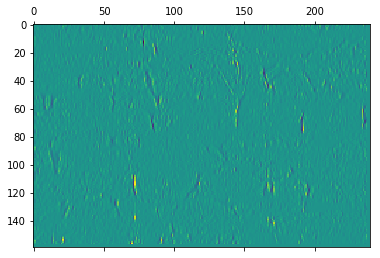

In [16]:
conv = np.zeros(im.shape)

for ii in range(1, im.shape[0]-2):
    for jj in range(1, im.shape[1]-2):
        conv[ii, jj] = np.sum(im[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel)

plt.matshow(conv)

# Why are convolutions useful for neural networks?

- Natural images contain correlations
- Reduce the number of parameters in training

In [15]:
train_data, test_data, train_labels, test_labels = load_fashion()

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D, Dropout

/Users/arokem/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=train_data.shape[1:], activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.fit(train_data, train_labels, epochs=10, batch_size=100, validation_split=0.2)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 1s 1ms/step - loss: 0.6685 - acc: 0.7667 - val_loss: 0.3066 - val_acc: 0.9333
Epoch 2/10
480/480 [==============================] - 0s 598us/step - loss: 0.2087 - acc: 0.9375 - val_loss: 0.2280 - val_acc: 0.9167
Epoch 3/10
480/480 [==============================] - 0s 603us/step - loss: 0.1354 - acc: 0.9500 - val_loss: 0.2170 - val_acc: 0.9250
Epoch 4/10
480/480 [==============================] - 0s 539us/step - loss: 0.1247 - acc: 0.9479 - val_loss: 0.2581 - val_acc: 0.9250
Epoch 5/10
480/480 [==============================] - 0s 624us/step - loss: 0.1019 - acc: 0.9583 - val_loss: 0.2229 - val_acc: 0.9333
Epoch 6/10
480/480 [==============================] - 0s 899us/step - loss: 0.0885 - acc: 0.9625 - val_loss: 0.2262 - val_acc: 0.9333
Epoch 7/10
480/480 [==============================] - 0s 551us/step - loss: 0.0828 - acc: 0.9646 - val_loss: 0.2185 - val_acc: 0.9250
Epoch 8/10
480/480

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=train_data.shape[1:], activation='relu'))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(Conv2D(64, kernel_size=3))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.fit(train_data, train_labels, epochs=10, batch_size=100, validation_split=0.2)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 1s 2ms/step - loss: 0.9582 - acc: 0.5708 - val_loss: 0.7346 - val_acc: 0.8750
Epoch 2/10
480/480 [==============================] - 1s 1ms/step - loss: 0.5839 - acc: 0.8917 - val_loss: 0.4176 - val_acc: 0.9167
Epoch 3/10
480/480 [==============================] - 1s 1ms/step - loss: 0.3204 - acc: 0.9250 - val_loss: 0.2775 - val_acc: 0.8833
Epoch 4/10
480/480 [==============================] - 1s 1ms/step - loss: 0.2077 - acc: 0.9187 - val_loss: 0.2270 - val_acc: 0.9083
Epoch 5/10
480/480 [==============================] - 1s 1ms/step - loss: 0.1890 - acc: 0.9396 - val_loss: 0.2436 - val_acc: 0.9000
Epoch 6/10
480/480 [==============================] - 1s 1ms/step - loss: 0.1664 - acc: 0.9375 - val_loss: 0.2271 - val_acc: 0.9167
Epoch 7/10
480/480 [==============================] - 1s 1ms/step - loss: 0.1546 - acc: 0.9438 - val_loss: 0.2477 - val_acc: 0.9000
Epoch 8/10
480/480 [==========

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1), padding='same'))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="adadelta",
              metrics=['accuracy'])

In [26]:
model.fit(train_data, train_labels, epochs=10, batch_size=100, validation_split=0.2)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=100)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 2s 4ms/step - loss: 1.0128 - acc: 0.6250 - val_loss: 0.7957 - val_acc: 0.8417
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.6379 - acc: 0.8250 - val_loss: 0.4432 - val_acc: 0.8167
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.5064 - acc: 0.7562 - val_loss: 0.3050 - val_acc: 0.9083
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2803 - acc: 0.8917 - val_loss: 0.4037 - val_acc: 0.8083
Epoch 5/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2891 - acc: 0.8875 - val_loss: 0.2388 - val_acc: 0.9167
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2184 - acc: 0.9229 - val_loss: 0.2266 - val_acc: 0.9167
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1891 - acc: 0.9313 - val_loss: 0.2143 - val_acc: 0.9250
Epoch 8/10
480/480 [==========